# Support Vector Regression (SVR)

We will apply the SVR model to the same problem of position vs salary of a company, which has some non-linear relationship.

We want to train the SVR model on the dataset to learn and understand the correlations between the position level and salary. And remember the problem: we are hiring a person who is expecting salary of $160,000 per annum, justifying the fact he/she has earned this much salary in the previous company. He/she was a regional manmager in the previous company for a couple of years, which we take as position_level = 6.5.

We want to know the predicted salary for the position level = 6.5, predicted by the SVR model.

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [29]:
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)
print(type(dataset))

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
<class 'pandas.core.frame.DataFrame'>


In [4]:
# Extract the position level

print(dataset.iloc[:, 1:-1])
print(type(dataset.iloc[:, 1:-1]))

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
<class 'pandas.core.frame.DataFrame'>


In [5]:
# Extract the position level values only

dataset.iloc[:, 1:-1].values

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
# Extract the salary column

print(dataset.iloc[:, -1])
print(type(dataset.iloc[:, -1]))

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64
<class 'pandas.core.series.Series'>


In [7]:
# Extract the salary values only

dataset.iloc[:, -1].values

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [30]:
# Matrix of features X

X = dataset.iloc[:, 1:-1].values
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [31]:
# Dependent variable vector y

y = dataset.iloc[:, -1].values
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [17]:
# y is now a 1D array of 10 elements or a vector

y.shape

(10,)

In [32]:
# Reshaping y to make it a 2D array from 1D array. We do this reshaping because the "standardscaler" class which does
# feature scaling or standardization expects a 2D array as its input.

y = y.reshape(len(y),1)

In [33]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [10]:
# y is now a 2D array of 10 rows and 1 column.

y.shape

(10, 1)

## Feature Scaling

In SVR, feature scaling is very important. Because in the SVR model, we do not have this explicit equation of the dependent variable wrt to features, and there is no coefficients multiplying each of the features, and therefore not compensating with lower values for the features taking higher values. This time the SVR model has an implicit equation of dependent variable wrt features. So, we must have to apply the feature scaling for SVR model.

So, feature scaling is needed when there is an **explicit equation** of dependent variable wrt features (where the coefficients can compensate by lowering its values for features having higher values). This includes simple linear regression, multiple linear regression and polynomial linear regression etc.

And for other models which has **implicit relationship** between the dependent variable $y$ and matrix of features $X$. For these models we have to apply feature scaling.

We won't split the dataset into training and test sets as we want to use maximum data to learn these correlations between position levels and salaries.

Here we must have to apply feature scaling on both the matrix of features $X$ and the dependent variable vector $y$, because the salary values are much larger than the position level values and hence they might be neglected in the SVR model. But we don't apply feature scaling to dummy variables resulting from OneHotensoding, and also when $y$ takes binary 0 or 1 values, because they are already in the range. We apply feature scaling when $y$ takes much higher values than the features, then we have to apply feature scaling to all the features and dependent variable to put everything in the same range. Also, remember, apply feature scaling after the split into train and test sets.

Also, we have to apply **inverse transformation** to get the final prediction and plots in the original scale.

**Basic format:**

```
from library_name.module_name import class_name
object_name_of_the_class = class_name(give arguments if needed)
object_name.method_name(give the argument on which this method/function is to be applied)  
or,
object_name.function_name(give the argument on which this method/function is to be applied)
```

Some mostly used methods/functions are fit(), trnasform(), fit_transform(), predict() etc.

**Some important key-words are:**

actual values,

predicted values,

original scale,

standardized scale.

In [34]:
# We StandardScaler class of the sklearn.preprocessing module.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()   # Create an object of the StandardScaler class for X.
sc_y = StandardScaler()   # Create an object of the StandardScaler class for y.
X = sc_X.fit_transform(X)   # Apply standardization/feature scaling on X. It computes the mean and S.D. of each column of X and standardize (standardization means the transformation (X - mu) /sigma for each value) the corresponding column.
y = sc_y.fit_transform(y)   # Apply standardization/feature scaling on y. It computes the mean and S.D. of the vector y and standardize (standardization means the transformation (y - mu) /sigma for each value) dependent variable vector column.

# Here we have created two StandardScaler obejcts, one for X and another for y. This is done because X and y columns have different
# mean and S.D. with which we standardize the corresponding columns.

# Basic format:
# from library_name.module_name import class_name
# object_name_of_the_class = class_name(give arguments if needed)
# object_name.method_name(give the argument on which this method/function is to be applied)  or object_name.function_name(give the argument on which this method/function is to be applied)
# Some mostly used methods/functions are fit(), trnasform(), fit_transform(), predict() etc.

In [35]:
print(X)

# We see that the X has been standardized and takes values within the range [-3, 3].

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [36]:
print(y)

# We see that the y has been standardized and takes values within the range [-3, 3].

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

Now we will train the SVR model on the whole dataset (we are not dividing the data into training and test sets here).

Here we use the non-linear kernel Gaussian RBF (radial basis function),

$K(\vec{x}, \vec{l}^i) = e^{-\frac{||\vec{x} - \vec{l}^i||^2}{2 \sigma^2}}$

In [48]:
# scikit-learn is the best Data Science library excluding Deep Learning (for DL, we have TensorFLow and Pytorch). For
# any ML model that is not based on neural networks, scikit-learn is best.

# We use SVR class of the sklearn.svm module

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')   # Create an object or instance 'regressor' of the SVR class. The kernel learn linear/non-linear relationship in the data. We use Gaussian RBF (Radial basis function) kernel. In this line, we have build the SVR model.
trained_SVR_model = regressor.fit(X, y)   # The SVR model is now trained on the whole dataset using fit() function, to learn the correlations between the position level and salaries.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Predicting a new result

Now we will predict salary values for new position levels i.e., we predict $y$ for a new $X$.

The input of the **predict()** method will be in transformed/standardized value as the SVR model is trained on transformed/standardized values.

The **predict()** method will return the values in transformed/standardized scale as both $X$ and $y$ are now in transformed values (or standardized values).

Here we have to use **inverse transformation**, and we have to get the results in the original scale.

In [70]:
# Now we predict the salary for a new position level = 6.5. Remember that this 6.5 is in the original scale and our SVR model is
# trained on the tranformed values. So, we have to insert transformed/standerdized value of 6.5 as a 2D array as the predict()
# method expects its input as a 2D array.

# Here we see the importance of using two different objects of the StandardScaler class, one is for X and one is for y. If we would just
# use one object sc StandardScaler class and transform 6.5, it would use the mean and S.D. of the last array it has used i.e., of the y array.
# This is completely wrong as 6.5 value is not a y-value (salary), rather it is a X value (position level).

print(sc_X.transform([[6.5]]))   # Here, the value 6.5 is standardized using the mean and S.D. of the array used previously by the sc_X object i.e. of the X array. And check that this value is coming 0.348 which is in between the standardized value of 6 and 7.
print(sc_y.transform([[6.5]]))   # Here, the value 6.5 is standardized using the mean and S.D. of the array used previously by the sc_y object i.e. of the y array.

[[0.34815531]]
[[-0.8784642]]


In [66]:
# predict the salary (output will be in transformed/standerdized value) by taking the position level = 6.5 (we give transformed/standerdized value of 6.5
# as the SVR model is trained on the transformed/standerdized values).

trained_SVR_model.predict(sc_X.transform([[6.5]]))

# This is the transformed/standerdized value of the salary for the position level 6.5.

array([-0.27861589])

In [67]:
trained_SVR_model.predict(sc_X.transform([[6.5]])).shape

# It returns a 1D array having 1 element.

(1,)

In [73]:
trained_SVR_model.predict(sc_X.transform([[6.5]])).reshape((1, 1))

# Here we reshape to convert the 1D array into a 2D array. This reshaping is needed because the inverse_transform method takes
# a 2D array as its input.

array([[-0.27861589]])

In [74]:
# Now we do the inverse transformation of the above 2D array which is a y value. Thus we have used sc_y object to transform it into
# the original scale.

sc_y.inverse_transform(trained_SVR_model.predict(sc_X.transform([[6.5]])).reshape((1, 1)))   # inverse_transform method of the sc_y object is applied on the above 2D array which is basically the transformed/standerdized value of the salary for the position level 6.5.

# This returns the salary in the original scale for the position level 6.5. So, the salary predicted by the SVR model is $170,370. Nice!!

array([[170370.0204065]])

## Visualising the SVR results

Now we will check the results by visulaizing in plots.

In [89]:
# Predict the y values by taking all the X values (rememeber X and y were trained on the transformed/standerdized values).
# So, the predicted y values will be in transformed/standerdized values.

trained_SVR_model.predict(X)

# This returns a 1D array of y.

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [91]:
trained_SVR_model.predict(X).reshape(-1, 1)

# We convert it into a 2D array as the inverse_transform method expects a 2D array as its input.
# Notice that we have done reshaping using reshape(-1, 1). Meaning that you do not have to specify an exact number for
# one of the dimensions in the reshape method. Pass -1 as the value, and NumPy will calculate this number for you.

array([[-0.6197853 ],
       [-0.62924694],
       [-0.56788994],
       [-0.49732233],
       [-0.44690338],
       [-0.36617206],
       [-0.14115569],
       [ 0.28557658],
       [ 0.78226531],
       [ 1.08559794]])

In [92]:
trained_SVR_model.predict(X).reshape(10, 1)

# Both reshape(-1, 1) and reshape(10, 1) returns the same 2D array.

array([[-0.6197853 ],
       [-0.62924694],
       [-0.56788994],
       [-0.49732233],
       [-0.44690338],
       [-0.36617206],
       [-0.14115569],
       [ 0.28557658],
       [ 0.78226531],
       [ 1.08559794]])

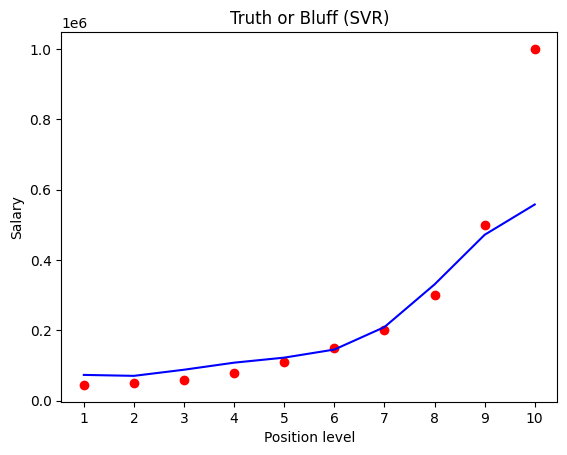

In [99]:
# Plot

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')   # Here we used inverse_transform method to scale the X and y values from standardazed values to their original values.
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(trained_SVR_model.predict(X).reshape(-1, 1)), 'blue')   # The y values are predicted by the SVR model for all the X values. Remember that as the model is trained with the transformed/standerdized values, the input of the predict() method will be X i.e., standerdized values. preddict() method returns 1D array for y which is reshaped into a 2D array as the inverse_transform() method expects 2D array as its input. Now we apply inverse_transform() method to this 2D array of predicted y values (to transform into original scale) with the mean and S.D. of y array and that is why we used sc_y object.
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.xticks(range(1, 11))
plt.ylabel('Salary')
plt.show()


The predicted values (blue line) by the SVR model is pretty close to the actual values (red dots), excpet for the position level 10 which is an outlier.

## Visualising the SVR results (for higher resolution and smoother curve)

Now, we predict the salary values for many many X values using the above SVR model. Instead of taking just 10 values for X, we now take equally spaced values and predict y values for all of them (high resolution). This will create a very smooth curve unlike the above blue curve which is plotted only for 10 values and hence not very smooth.

In [ ]:
X_grid = np.arange(1, 10.1, 0.1)   # Creates grid of equally spaces points for X in the range [1, 10]. This is an 1D array.
print(X_grid)

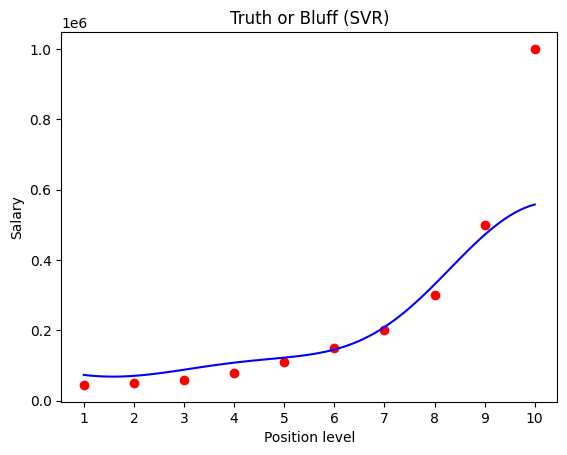

In [108]:
# Plot with high resolution

X_grid = np.arange(1, 10.1, 0.1)   # Creates grid of equally spaces points for X in the range [1, 10]. This is an 1D array.
# print(X_grid)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')   # Here we used inverse_transform method to scale the X and y values from standardazed values to their original values.
plt.plot(X_grid, sc_y.inverse_transform(trained_SVR_model.predict(sc_X.transform(X_grid.reshape(-1, 1))).reshape(-1, 1)), color = 'blue')   # As the X_grid is in original scale and it is an 1D array, we reshaped it to 2D array, we transform/standardize it. The predict() method of the trained_SVR_model takes the standardized 2D array X_grid and returns the 1D array of predicted values of y (in the standardized scale). This 1D array is again reshaped into a 2D array for inverse_transformation and get the predicted values in the original scale.
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.xticks(range(1, 11))
plt.ylabel('Salary')
plt.show()

# The curve with the predicted values by the SVR model is now very smooth as it is generated with huge number of data points.